In [1]:
# %% [code]
import os
import pandas as pd
import matplotlib.pyplot as plt

Loaded epoch 1: shape = (81, 23)
Loaded epoch 2: shape = (81, 23)
Loaded epoch 3: shape = (81, 23)
Loaded epoch 4: shape = (81, 23)
Loaded epoch 5: shape = (81, 23)
Loaded epoch 6: shape = (81, 23)
Loaded epoch 7: shape = (81, 23)
Loaded epoch 8: shape = (81, 23)
Loaded epoch 9: shape = (81, 23)
Loaded epoch 10: shape = (81, 23)
Loaded epoch 11: shape = (81, 23)
Loaded epoch 12: shape = (81, 23)
Loaded epoch 13: shape = (81, 23)
Loaded epoch 14: shape = (81, 23)
Loaded epoch 15: shape = (81, 23)
Loaded epoch 16: shape = (81, 23)
Loaded epoch 17: shape = (81, 23)
Loaded epoch 18: shape = (81, 23)
Loaded epoch 19: shape = (81, 23)
Loaded epoch 20: shape = (81, 23)

=== Epoch 1 DataFrame Information ===
Shape: (81, 23)

Columns:
['x', 'y', 'z', 'roi', 'roiNum', 'spared', 'data', 'delta_power', 'delta_rel', 'delta_log', 'theta_power', 'theta_rel', 'theta_log', 'alpha_power', 'alpha_rel', 'alpha_log', 'beta_power', 'beta_rel', 'beta_log', 'gamma_power', 'gamma_rel', 'gamma_log', 'entropy_5s

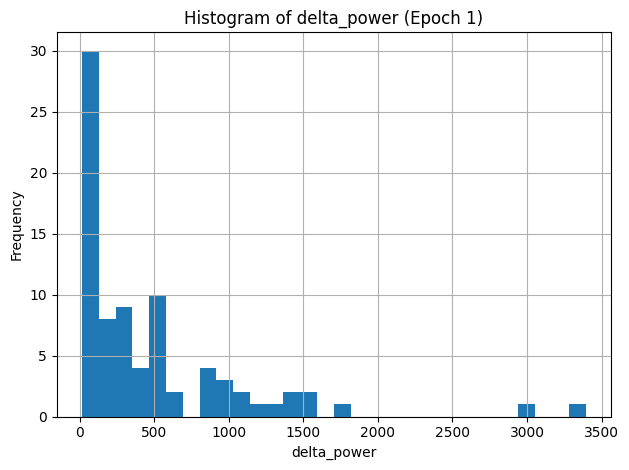

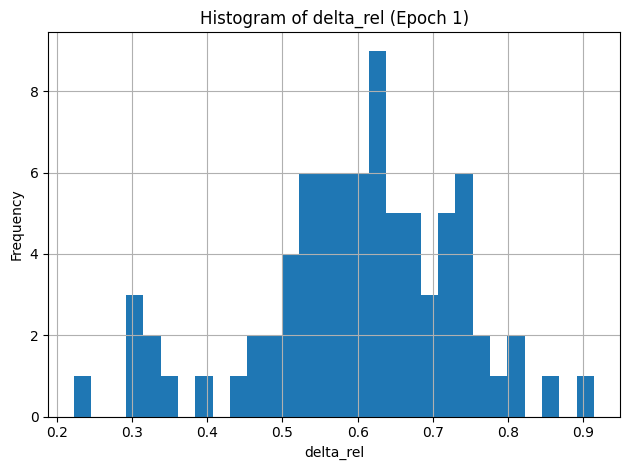

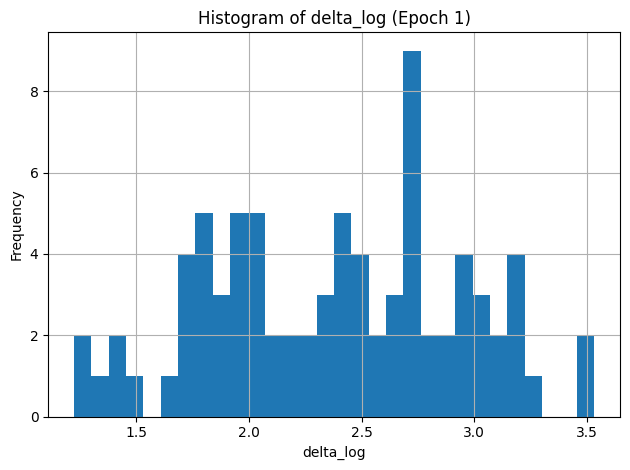

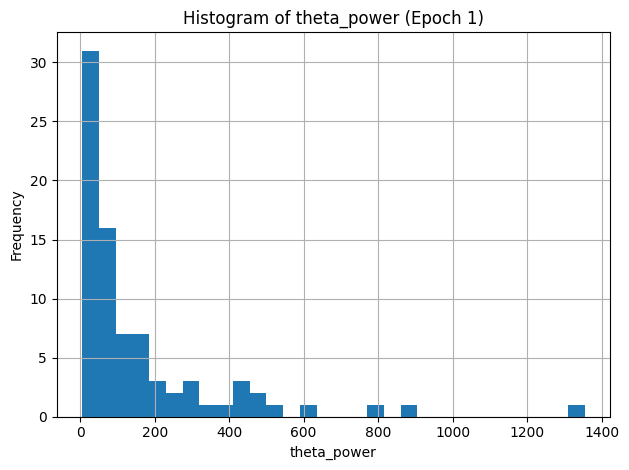

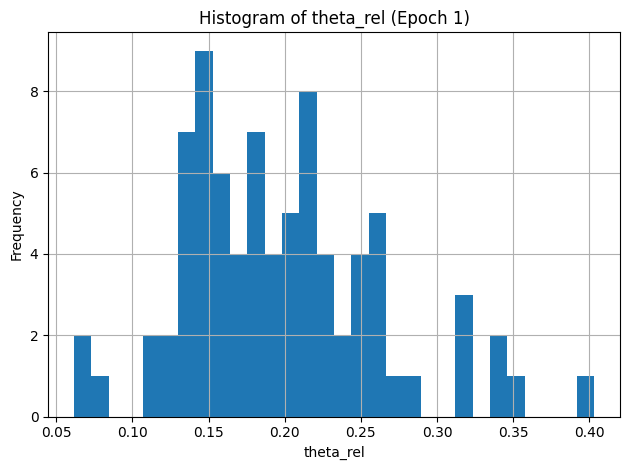

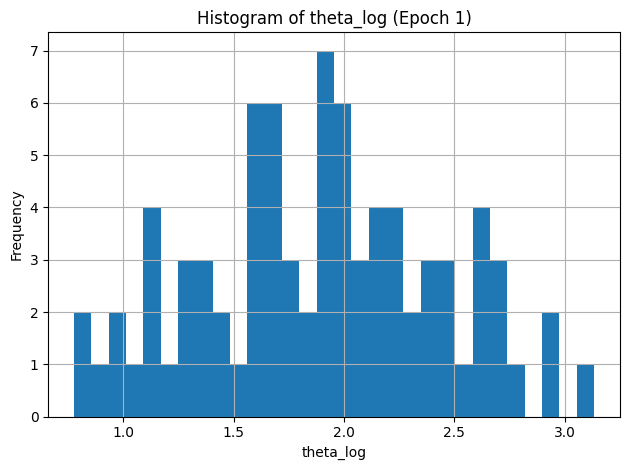

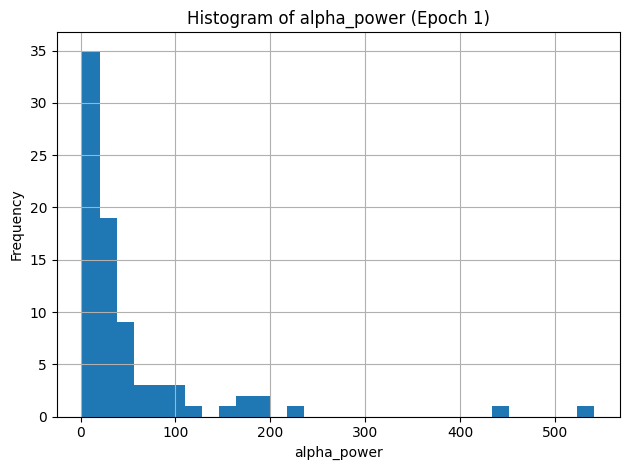

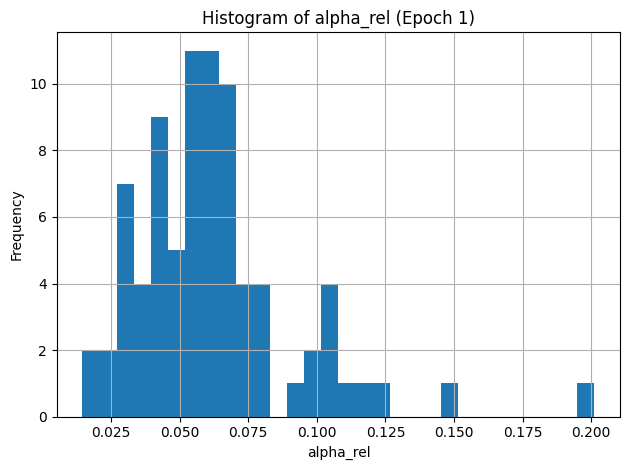

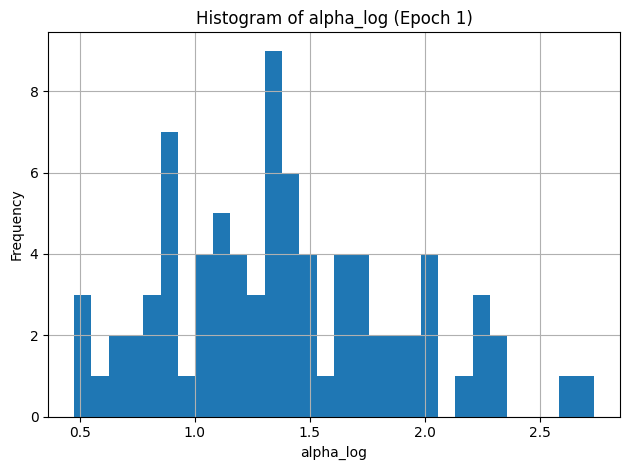

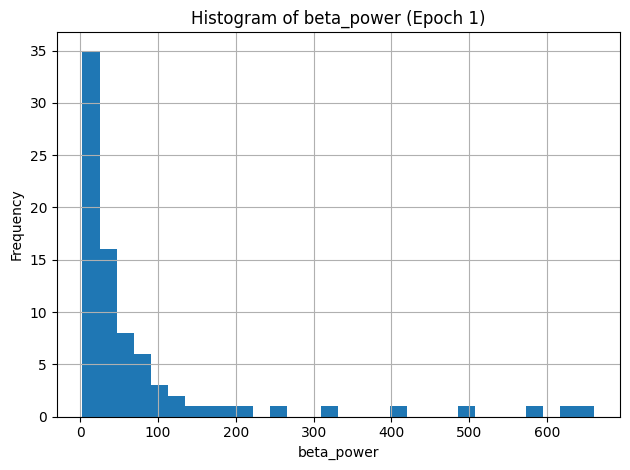

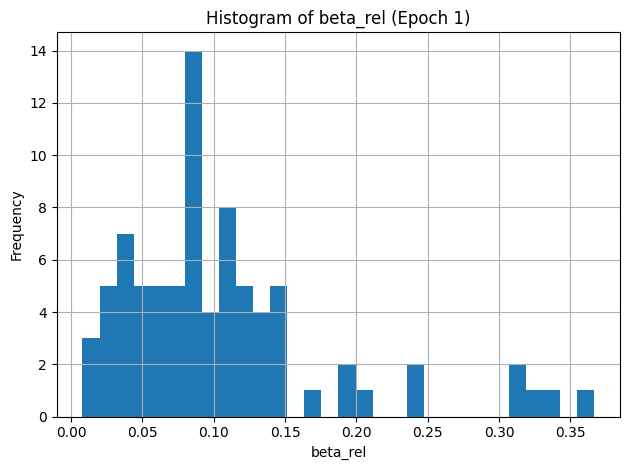

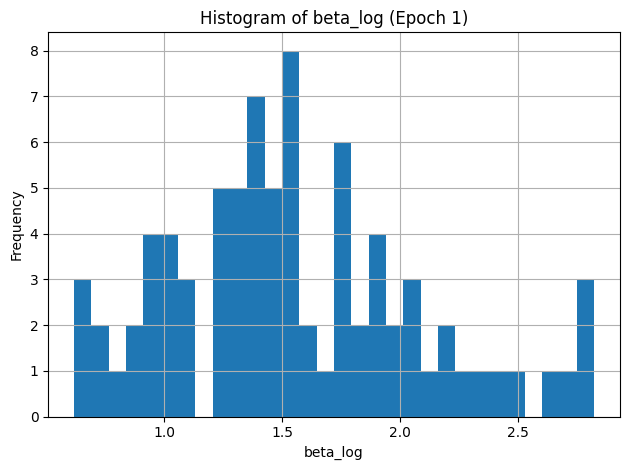

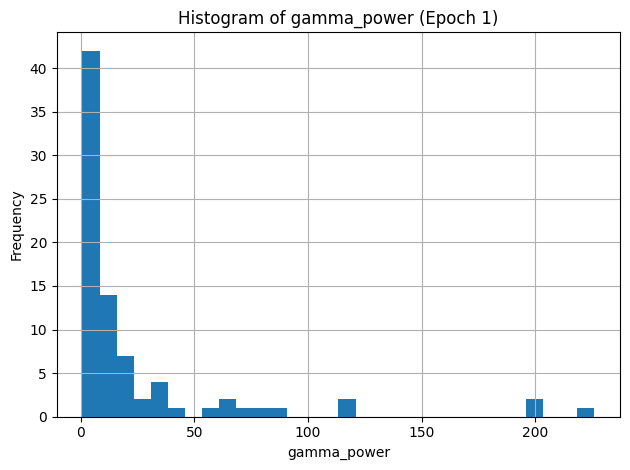

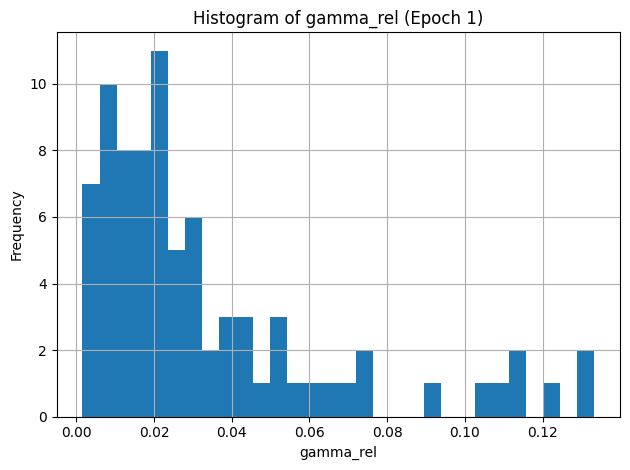

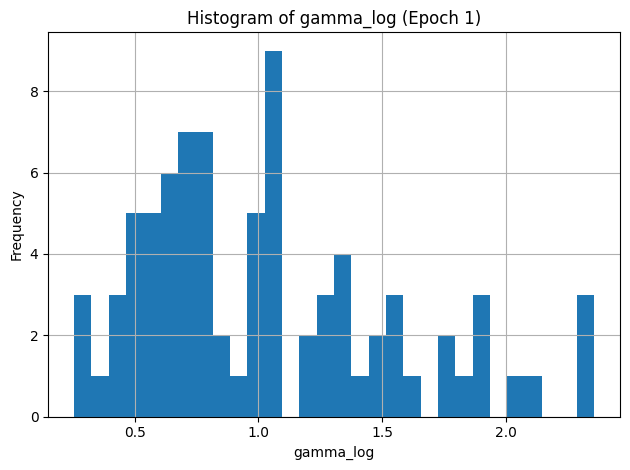

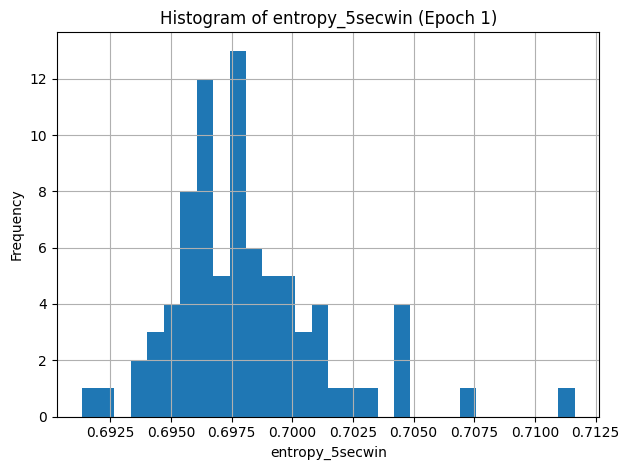

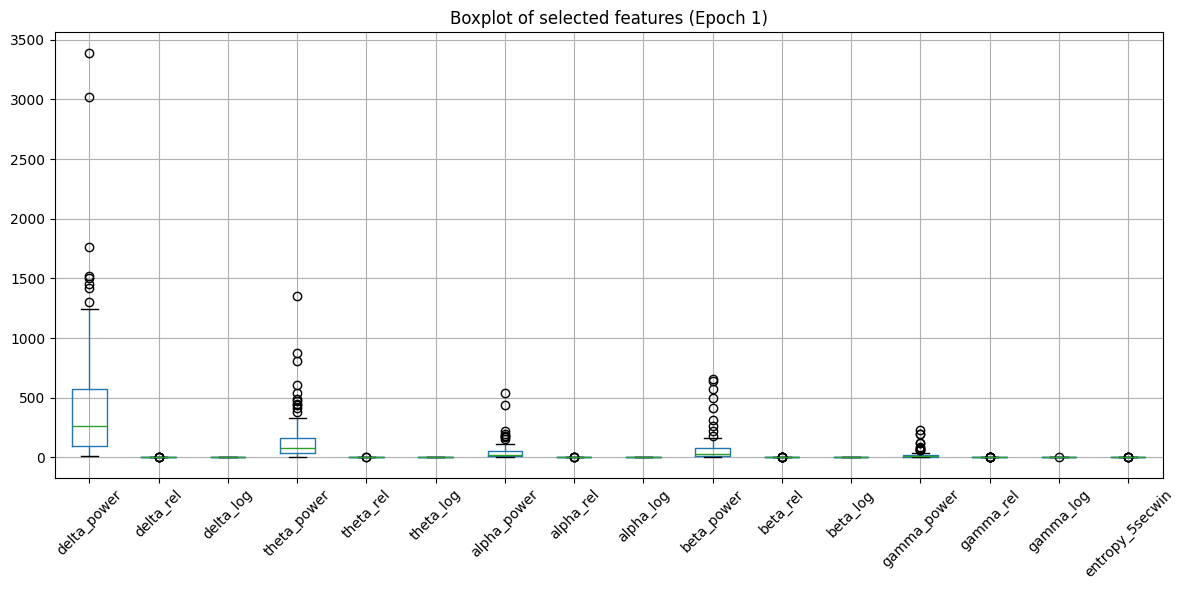


=== Summary for each epoch ===
Epoch 1: shape = (81, 23)
Epoch 2: shape = (81, 23)
Epoch 3: shape = (81, 23)
Epoch 4: shape = (81, 23)
Epoch 5: shape = (81, 23)
Epoch 6: shape = (81, 23)
Epoch 7: shape = (81, 23)
Epoch 8: shape = (81, 23)
Epoch 9: shape = (81, 23)
Epoch 10: shape = (81, 23)
Epoch 11: shape = (81, 23)
Epoch 12: shape = (81, 23)
Epoch 13: shape = (81, 23)
Epoch 14: shape = (81, 23)
Epoch 15: shape = (81, 23)
Epoch 16: shape = (81, 23)
Epoch 17: shape = (81, 23)
Epoch 18: shape = (81, 23)
Epoch 19: shape = (81, 23)
Epoch 20: shape = (81, 23)


In [2]:
# (for the first subject)
base_path = "/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/hup/derivatives/clean"
subject = "sub-RID0031"
subject_dir = os.path.join(base_path, subject)

# Dictionary to hold the loaded DataFrames for each epoch
epochs = {}

# Loop through epochs 1 to 20 (assuming files are named "metadata_and_features_epch{epoch}.pkl")
for epoch in range(1, 21):
    file_name = f"metadata_and_features_epch{epoch}.pkl"
    file_path = os.path.join(subject_dir, file_name)
    if os.path.exists(file_path):
        df = pd.read_pickle(file_path)
        epochs[epoch] = df
        print(f"Loaded epoch {epoch}: shape = {df.shape}")
    else:
        print(f"WARNING: File {file_path} does not exist.")

# %% [code]
# Inspect the DataFrame for epoch 1 in detail
df1 = epochs[1]
print("\n=== Epoch 1 DataFrame Information ===")
print("Shape:", df1.shape)
print("\nColumns:")
print(df1.columns.tolist())
print("\nData types:")
print(df1.dtypes)
print("\nFirst 5 rows:")
print(df1.head())
print("\nSummary statistics (numerical columns):")
print(df1.describe())

# %% [code]
# If the channel (electrode) names are stored in the index, show the first 5 index values:
print("\nIndex (channel labels) for epoch 1:")
print(df1.index.tolist()[:5])

# %% [code]
# Plot histograms for all feature columns (excluding metadata and the raw 'data' column)
# Assuming that metadata columns are: ['x', 'y', 'z', 'roi', 'roiNum', 'spared'] 
# and 'data' is the raw signal.
metadata_cols = ['x', 'y', 'z', 'roi', 'roiNum', 'spared', 'data']
feature_cols = [col for col in df1.columns if col not in metadata_cols]

print("\nPlotting histograms for feature columns (Epoch 1):")
for col in feature_cols:
    plt.figure()
    df1[col].hist(bins=30)
    plt.title(f"Histogram of {col} (Epoch 1)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# %% [code]
# Plot a boxplot for the feature columns (to check distributions and outliers)
plt.figure(figsize=(12, 6))
df1[feature_cols].boxplot(rot=45)
plt.title("Boxplot of selected features (Epoch 1)")
plt.tight_layout()
plt.show()

# %% [code]
# Print a summary (shape) for each epoch file for the subject
print("\n=== Summary for each epoch ===")
for epoch, df in epochs.items():
    print(f"Epoch {epoch}: shape = {df.shape}")
